## Importing the Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

## Reading Data

In [2]:
df = pd.read_csv("all-data.csv",encoding='latin-1', header = None)
df.columns = ["Sentiment", "News_Headline"]
df.head()

,Sentiment,News_Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [3]:
print('The shape of the data is:',df.shape[0],'rows and',df.shape[1],'columns')

The shape of the data is: 4846 rows and 2 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4846 non-null   object
 1   News_Headline  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


**Missing Values.**

In [5]:
missing_number = df.isnull().sum().sort_values(ascending=False)
missing_percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
missing_values

,Missing_Number,Missing_Percent
Sentiment,0,0.0
News_Headline,0,0.0


In [6]:
df.describe(include = "all")

,Sentiment,News_Headline
count,4846,4846
unique,3,4838
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2879,2


**Duplicates.**

In [7]:
print('There are:',len(df[df.duplicated(subset=['News_Headline'])]),'duplicates in the dataset')

There are: 8 duplicates in the dataset


Dropping duplicates.

In [8]:
df.drop_duplicates(subset=['News_Headline'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4838 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4838 non-null   object
 1   News_Headline  4838 non-null   object
dtypes: object(2)
memory usage: 113.4+ KB


In [9]:
print('There are:',len(df[df.duplicated(subset=['News_Headline'])]),'duplicates in the dataset after deletion')

There are: 0 duplicates in the dataset after deletion


## WordCloud

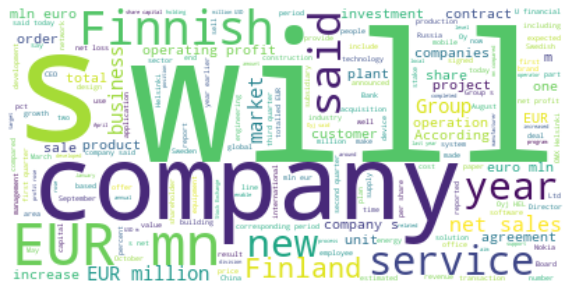

In [10]:
text = " ".join([x for x in df.News_Headline])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

**Positive.**

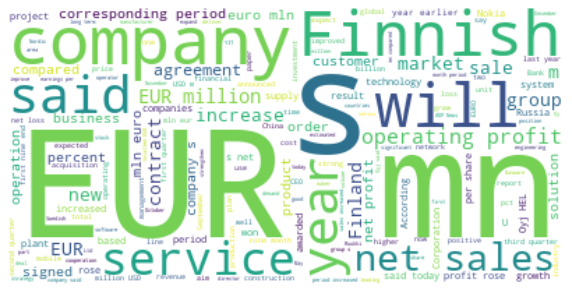

In [11]:
text = " ".join([x for x in df.News_Headline[df.Sentiment=='positive']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

**Neutral.**

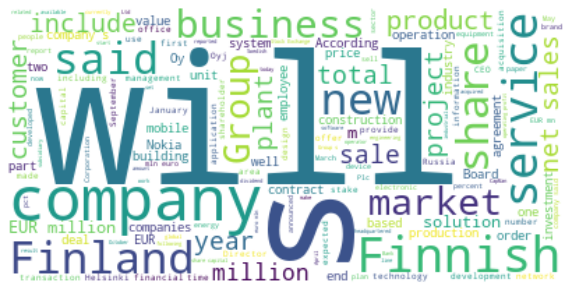

In [12]:
text = " ".join([x for x in df.News_Headline[df.Sentiment=='neutral']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

**Negative.**

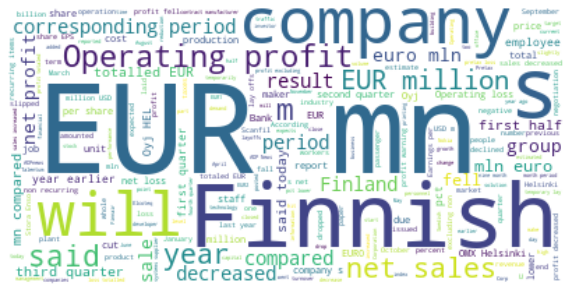

In [13]:
text = " ".join([x for x in df.News_Headline[df.Sentiment=='negative']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Sentiment Distribution.

In [14]:
Frequency = df['Sentiment'].value_counts()
Percentage = df['Sentiment'].value_counts(normalize=True)*100
Percentage=round(Percentage,2)
Count = pd.concat([Frequency, Percentage], axis=1, keys=['Frequency', 'Percentage (%)'])
Count

,Frequency,Percentage (%)
neutral,2872,59.36
positive,1362,28.15
negative,604,12.48


In [15]:
train,eva = train_test_split(df,test_size = 0.2)

In [17]:

from simpletransformers.classification import ClassificationModel


# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [26]:
# 0,1,2 : positive,negative
def making_label(st):
    if(st=='positive'):
        return 0
    elif(st=='neutral'):
        return 2
    else:
        return 1
    
train['label'] = train['Sentiment'].apply(making_label)
eva['label'] = eva['Sentiment'].apply(making_label)
train.head()

,Sentiment,News_Headline,label
2280,positive,Finnish silicon wafers manufacturer Okmetic Oy...,0
3926,neutral,The total value of the project is estimated to...,2
4344,neutral,The dual-fuel engines of the vessel can operat...,2
594,positive,The bank sees a potential for Getinge share to...,0
4658,negative,"Finnish Scanfil , a systems supplier and contr...",1


In [22]:
train_df = pd.DataFrame({
    'text': train['News_Headline'][:1500].replace(r'\n', ' ', regex=True),
    'label': train['label'][:1500]
})

eval_df = pd.DataFrame({
    'text': eva['News_Headline'][-400:].replace(r'\n', ' ', regex=True),
    'label': eva['label'][-400:]
})

In [23]:
train_df

,text,label
2280,Finnish silicon wafers manufacturer Okmetic Oy...,0
3926,The total value of the project is estimated to...,2
4344,The dual-fuel engines of the vessel can operat...,2
594,The bank sees a potential for Getinge share to...,0
4658,"Finnish Scanfil , a systems supplier and contr...",1
...,...,...
1629,The deal was worth about EUR 1.2 mn .,2
749,"A portion , $ 12.5 million , will be recorded ...",0
3130,Stichting Pensioenfonds ABP : 4 118 122 shares...,2
4688,"( ADPnews ) - May 4 , 2010 - Finnish cutlery a...",1


In [27]:
model.train_model(train_df)

c:\Users\ENCHILL\anaconda3\lib\site-packages\simpletransformers\classification\classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
Epoch 1 of 1:   0%|          | 0/1 [00:00<?, ?it/s]